# 05 - a - Mars - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object
planet=Planet("MARS")
planet.h_skip = 120000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3 )

vinf_kms_array = np.linspace( 0.0,   20.0,  11)
LD_array       = np.linspace( 0.0,    0.4 , 11)

In [3]:
os.makedirs('../data/jsr-paper/mars/')

In [4]:
runID = 'mars-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+120.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [5]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(110.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (2400.0, 1.0, -80.0, -4.0, 1E-10, 400.0)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 1.0, -80.0, -4.0, 1E-10, 400.0)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/jsr-paper/mars/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -8.77632667801663 USL: -8.77632667801663, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: Arrival V_infty: 0.0 km/s, L/D:0.04 OSL: -8.683558818767779 USL: -8.877132149777026, TCW: 0.19357333100924734 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: Arrival V_infty: 0.0 km/s, L/D:0.08 OSL: -8.598265705531958 USL: -8.987268374785344, TCW: 0.38900266925338656 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: Arrival V_infty: 0.0 km/s, L/D:0.12 OSL: -8.519817374577542 USL: -9.107128531341004, TCW: 0.5873111567634623 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: Arrival V_infty: 0.0 km/s, L/D:0.16 OSL: -8.447731623618893 USL: -9.237863072052278, TCW: 0.7901314484333852 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: Arrival V_infty: 0.0 km/s, L/D:0.2 OSL: -8.38141107948104 USL: -9.37940185757543, TCW: 0.9979907780943904 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: Arrival V_infty: 0.0 km/s, L/D:0.24 OSL: -8.32016548698084 USL: -9.532567995771387, TCW: 1.2124025087905466 EFOS: 1.0 EFUS: 1.0
Run #8 of 12

Run #59 of 121: Arrival V_infty: 10.0 km/s, L/D:0.12 OSL: -11.319718422339065 USL: -13.33772844745181, TCW: 2.018010025112744 EFOS: 1.0 EFUS: 1.0
Run #60 of 121: Arrival V_infty: 10.0 km/s, L/D:0.16 OSL: -11.165179383857321 USL: -13.953117527391441, TCW: 2.78793814353412 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: Arrival V_infty: 10.0 km/s, L/D:0.2 OSL: -11.034993412256881 USL: -14.664859150150733, TCW: 3.6298657378938515 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: Arrival V_infty: 10.0 km/s, L/D:0.24 OSL: -10.9234902155913 USL: -15.476569241087418, TCW: 4.5530790254961175 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: Arrival V_infty: 10.0 km/s, L/D:0.28 OSL: -10.826603360197623 USL: -16.390603861480486, TCW: 5.564000501282862 EFOS: 1.0 EFUS: 1.0
Run #64 of 121: Arrival V_infty: 10.0 km/s, L/D:0.32 OSL: -10.74141736290403 USL: -17.411738069655257, TCW: 6.670320706751227 EFOS: 1.0 EFUS: 1.0
Run #65 of 121: Arrival V_infty: 10.0 km/s, L/D:0.36 OSL: -10.665432868037897 USL: -18.54056126167052, TCW: 7.875128393632

Run #116 of 121: Arrival V_infty: 20.0 km/s, L/D:0.2 OSL: -11.391016460602259 USL: -17.464980788015964, TCW: 6.073964327413705 EFOS: 1.0 EFUS: 1.0
Run #117 of 121: Arrival V_infty: 20.0 km/s, L/D:0.24 OSL: -11.269306836060423 USL: -19.006885519844218, TCW: 7.737578683783795 EFOS: 1.0 EFUS: 1.0
Run #118 of 121: Arrival V_infty: 20.0 km/s, L/D:0.28 OSL: -11.164763968587067 USL: -20.73861427821612, TCW: 9.573850309629051 EFOS: 1.0 EFUS: 1.0
Run #119 of 121: Arrival V_infty: 20.0 km/s, L/D:0.32 OSL: -11.073568312971474 USL: -22.526569638917863, TCW: 11.453001325946389 EFOS: 1.0 EFUS: 1.0
Run #120 of 121: Arrival V_infty: 20.0 km/s, L/D:0.36 OSL: -10.992764173239266 USL: -24.365277909175347, TCW: 13.372513735936082 EFOS: 1.0 EFUS: 1.0
Run #121 of 121: Arrival V_infty: 20.0 km/s, L/D:0.4 OSL: -10.92049562828106 USL: -26.28420725035903, TCW: 15.363711622077972 EFOS: 1.0 EFUS: 1.0


In [6]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(110.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(110.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/jsr-paper/mars/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/mars/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 1.0118818318625384 QDOT_MAX: 24.48278520225487 J_MAX: 4596.452052086277 STAG. PRES: 0.019638627599913725
V_infty: 0.0 km/s, L/D: 0.04 G_MAX: 1.0850166948004838 QDOT_MAX: 25.225121883260726 J_MAX: 4725.512095858182 STAG. PRES: 0.01835742143460218
V_infty: 0.0 km/s, L/D: 0.08 G_MAX: 1.164756126696007 QDOT_MAX: 26.009616727842587 J_MAX: 4856.7379121319245 STAG. PRES: 0.0171756525163453
V_infty: 0.0 km/s, L/D: 0.12 G_MAX: 1.2472585720682954 QDOT_MAX: 26.83694189509977 J_MAX: 4990.429982101152 STAG. PRES: 0.016084096366433365
V_infty: 0.0 km/s, L/D: 0.16 G_MAX: 1.3367079765259307 QDOT_MAX: 27.698182225345093 J_MAX: 5125.668585057925 STAG. PRES: 0.015083755243593034
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 1.4357745697852375 QDOT_MAX: 28.545209088450132 J_MAX: 5262.146618172648 STAG. PRES: 0.01417725720054207
V_infty: 0.0 km/s, L/D: 0.24 G_MAX: 1.542891669340721 QDOT_MAX: 29.35704646858815 J_MAX: 5398.232493618921 STAG. PRES: 0.013356014073458499
V_infty: 0.0 km/

V_infty: 10.0 km/s, L/D: 0.2 G_MAX: 27.904455418228963 QDOT_MAX: 536.6970307254231 J_MAX: 27962.10247843834 STAG. PRES: 0.14443120198021298
V_infty: 10.0 km/s, L/D: 0.24 G_MAX: 31.695255486663942 QDOT_MAX: 565.7511864956583 J_MAX: 29294.95979767439 STAG. PRES: 0.13164041325056422
V_infty: 10.0 km/s, L/D: 0.28 G_MAX: 35.91905801890433 QDOT_MAX: 595.163929249458 J_MAX: 30586.976041764163 STAG. PRES: 0.1210492314778109
V_infty: 10.0 km/s, L/D: 0.32 G_MAX: 40.5921045037678 QDOT_MAX: 625.0499146962788 J_MAX: 31839.630579168374 STAG. PRES: 0.11228427181583904
V_infty: 10.0 km/s, L/D: 0.36 G_MAX: 45.46119677763393 QDOT_MAX: 656.2051040384956 J_MAX: 33051.12516873689 STAG. PRES: 0.10456891812500439
V_infty: 10.0 km/s, L/D: 0.4 G_MAX: 50.877799341224 QDOT_MAX: 686.0946408521463 J_MAX: 34222.97131138374 STAG. PRES: 0.09754131268387775
V_infty: 12.0 km/s, L/D: 0.0 G_MAX: 20.417781080912135 QDOT_MAX: 638.5748294799772 J_MAX: 27625.245753281295 STAG. PRES: 0.3954469936544291
V_infty: 12.0 km/s, L/D

V_infty: 20.0 km/s, L/D: 0.36 G_MAX: 242.38612022297815 QDOT_MAX: 4912.621064125741 J_MAX: 109844.39688230143 STAG. PRES: 0.3828733009492963
V_infty: 20.0 km/s, L/D: 0.4 G_MAX: 266.87948521769374 QDOT_MAX: 5178.319336521834 J_MAX: 113931.03597469686 STAG. PRES: 0.35780026090431105


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

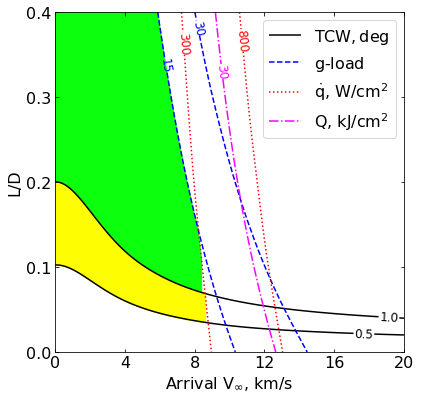

In [11]:
x = np.loadtxt('../data/jsr-paper/mars/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/mars/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  210)
y_new =  np.linspace( 0.0,   0.4 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
#S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.5,1.0])

Glevels = np.array([15.0, 30.0])
Qlevels = np.array([300, 800.0])
Hlevels = np.array([30.0])
#Slevels = np.array([0.8])


plt.figure()
#plt.rcParams["font.family"] = "Times New Roman"
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')

fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta',linestyles='dashdot')

plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks(np.array([ 0, 4, 8, 12, 16, 20]), fontsize=16)
plt.yticks(np.array([ 0.0, 0.1, 0.2, 0.3, 0.4]),fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)

dat0 = ZCS1.allsegs[1][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,20,101)
y4 = F1(x4)
y4a =F1a(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)
y8 = np.minimum(y4,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')


plt.xlim([0.0,20.0])
plt.ylim([0.0,0.4])

plt.savefig('../data/jsr-paper/mars/mars-lift-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-lift-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-lift-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


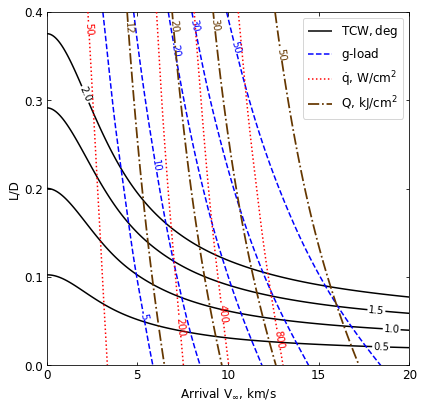

In [12]:
x = np.loadtxt('../data/jsr-paper/mars/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/mars/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/mars/'+runID+'stag_pres_atm_max_array.txt')

f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   20,  310)
y_new =  np.linspace( 0.0,   0.4 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])





Z1 = z1_new

G1 = g1_new

Q1 = q1_new

#S1 = s1_new

H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)
#X, Y = meshgrid(x, y)


Zlevels = np.array([0.5,1.0,1.5,2.0])

Glevels = np.array([5.0, 10.0, 20.0, 30.0, 50.0])
Qlevels = np.array([50.0, 200.0, 400.0, 800.0])
Hlevels = np.array([12, 20.0, 30.0, 50.0])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)



ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)



GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)
GCS1.collections[4].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')


QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)



HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20]),fontsize=12)
plt.yticks(np.array([ 0.0, 0.1, 0.2, 0.3, 0.4]),fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)



plt.savefig('../data/jsr-paper/mars/mars-lift-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-lift-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/mars/mars-lift-large.eps', dpi=300,bbox_inches='tight')

plt.show()